In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def hamiltonian(k, N, t=1.0):
    """
    Construit la matrice Hamiltonienne H(k) pour un nanoruban armchair
      H = -t ∑_l [
             ∑_{m impair} a_l†(m) b_{l-1}(m)
           + ∑_{m pair} a_l†(m) b_l(m+1)
          ] + c.h.
          -t ∑_l ∑_{m=1}^{N-1} [
             b_l†(m+1) a_l(m) + a_l†(m+1) b_l(m)
          ] + c.h.

    La base utilisée est telle que pour chaque chaîne transversale m (m=1,...,N) :
      - a(m) est indexé par 2*(m-1)
      - b(m) est indexé par 2*(m-1)+1

    La matrice H(k) est donc de dimension 2N x 2N.
    """
    H = np.zeros((2 * N, 2 * N), dtype=complex)

    # Terme A : contributions liées à la direction infinie

    # (i) Pour m impair : couplage a(m) <-> b(m) avec facteur de phase e^{-ik}
    for m in range(1, N + 1):
        if m % 2 == 1:
            i_a = 2 * (m - 1)         # indice pour a(m)
            i_b = i_a + 1             # indice pour b(m)
            H[i_a, i_b] += -t * np.exp(-1j * k)
            H[i_b, i_a] += -t * np.exp(1j * k)

    # (ii) Pour m pair : couplage a(m) <-> b(m+1) sans facteur de phase
    # On vérifie que m+1 ne dépasse pas N (d'où la condition)
    for m in range(1, N + 1):
        if m % 2 == 0 and (m + 1) <= N:
            i_a = 2 * (m - 1)         # indice pour a(m)
            # Pour m+1, le site b se trouve à l'indice : 2*((m+1)-1)+1 = 2*m + 1
            i_b_next = 2 * m + 1
            H[i_a, i_b_next] += -t
            H[i_b_next, i_a] += -t

    # Terme B : hoppings dans la direction finie
    for m in range(1, N):
        # (i) Couplage entre a(m) et b(m+1)
        i_a = 2 * (m - 1)              # a(m)
        i_b_next = 2 * m + 1           # b(m+1) : 2*((m+1)-1)+1 = 2*m + 1
        H[i_a, i_b_next] += -t
        H[i_b_next, i_a] += -t

        # (ii) Couplage entre a(m+1) et b(m)
        i_a_next = 2 * m  + 1
        i_b = 2 * m
        H[i_a_next, i_b] += -t
        H[i_b, i_a_next] += -t

    return H

In [ ]:
# Paramètres du système
t = 1.0        # énergie de hopping
N = 500        # nombre de chaînes transversales (largeur du ruban)
nk = 100       # nombre de points pour la discrétisation de k
k_values = np.linspace(-np.pi, np.pi, nk)  # k dans [-π, π]

# Affichage de la matrice Hamiltonienne pour k=1
k0 = 1.0
H0 = hamiltonian(k0, N, t)
np.set_printoptions(precision=3, suppress=True)
#print("Matrice Hamiltonienne H(k=0) :")
#print(H0)

# Calcul des valeurs propres pour chaque k pour tracer la structure en bandes
bands = np.zeros((nk, 2 * N))
for i, k in enumerate(k_values):
    Hk = hamiltonian(k, N, t)
    evals = np.linalg.eigvalsh(Hk)  # diagonalisation de la matrice hermitienne
    bands[i, :] = np.sort(evals)

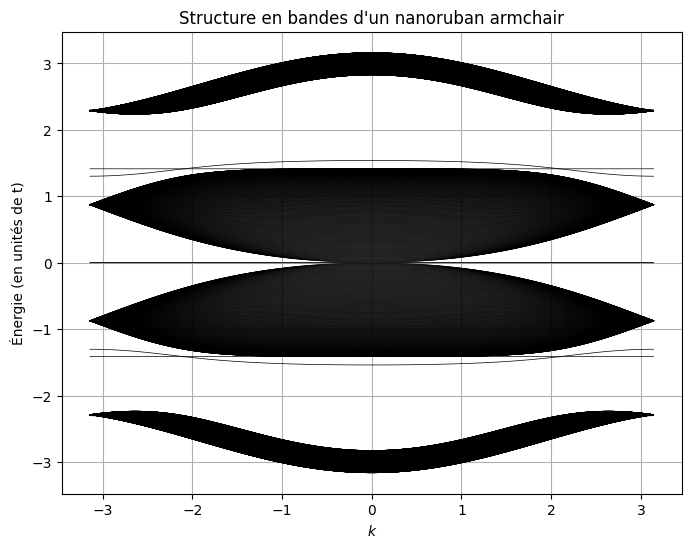

In [ ]:
# Tracé de la structure en bandes
plt.figure(figsize=(8, 6))
for n in range(2 * N):
    plt.plot(k_values, bands[:, n], color='black', lw=0.5)
plt.xlabel(r'$k$')
plt.ylabel("Énergie (en unités de t)")
plt.title("Structure en bandes d'un nanoruban armchair")
plt.grid(True)
plt.show()

In [ ]:
# Paramètres du système
t = 1.0        # énergie de hopping
N = 5        # nombre de chaînes transversales (largeur du ruban)
nk = 11       # nombre de points pour la discrétisation de k
k_values = np.linspace(-np.pi, np.pi, nk)  # k dans [-π, π]

# Affichage de la matrice Hamiltonienne pour k=1
k0 = 1.0
H0 = hamiltonian(k0, N, t)
np.set_printoptions(precision=3, suppress=True)
#print("Matrice Hamiltonienne H(k=0) :")
#print(H0)

# Calcul des valeurs propres pour chaque k pour tracer la structure en bandes
bands = np.zeros((nk, 2 * N))
for i, k in enumerate(k_values):
    Hk = hamiltonian(k, N, t)
    evals = np.linalg.eigvalsh(Hk)  # diagonalisation de la matrice hermitienne
    bands[i, :] = np.sort(evals)

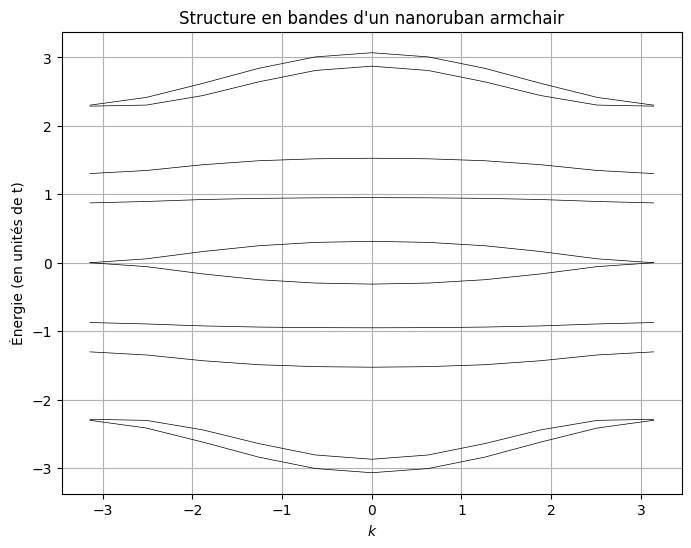

In [ ]:
# Tracé de la structure en bandes
plt.figure(figsize=(8, 6))
for n in range(2 * N):
    plt.plot(k_values, bands[:, n], color='black', lw=0.5)
plt.xlabel(r'$k$')
plt.ylabel("Énergie (en unités de t)")
plt.title("Structure en bandes d'un nanoruban armchair")
plt.grid(True)
plt.show()